### 데이터
Downloaded from: https://github.com/hyerica-bdml/class-2020-bigdata/tree/master/W02

### 문제
* 주어진 샘플 개수에 대해 Simple random sampling과 Stratified sampling을 통해 각각 100번씩 average distance를 추정하고 샘플 평균과 샘플 평균의 분산을 계산하는 Python 코드를 작성하시오.
* 샘플 개수를 1,000개, 10,000개, 100,000개, 1,000,000개로 증가시키면서 두 샘플 방식의 샘플 평균 분산을 그래프로 그리시오 (matplotlib 사용)

### 제출
* 모든 코드와 그래프를 담고 있는 Jupyter Notebook 파일 (.ipynb)

In [54]:
import math

def dist(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [9]:
with open("1000000.txt", "r") as f:
    point_lines = f.readlines()
    point_list = list()
    for line in point_lines:
        t = line.strip().split(',')
        point_list.append((float(t[1]), float(t[2])))

In [10]:
n_points = len(point_list)

In [11]:
n_points

1000000

In [12]:
test_n_samples = [ 1000, 2000, 4000, 8000, 16000 ]

# Simple Random Sampling

In [56]:
import random
import matplotlib.pyplot as plt 

def sample_pair_self(n_points):
    p = random.randrange(0, n_points)
    while True:
        q = random.randrange(0, n_points)
        if q is not p:
            break
    return (p, q)

def srs_average_dist_self(n_points, point_list, n_samples):
    if n_samples == 0:
        return 0
    sum = 0.;
    for _ in range(n_samples):
        p, q = sample_pair_self(n_points)
        sum += dist(point_list[p][0], point_list[p][1], point_list[q][0], point_list[q][1])
    return sum / float(n_samples)

def sample_pair(n_points1, n_points2):
    return (random.randrange(0, n_points1), random.randrange(0, n_points2))

def srs_average_dist(n_points1, point_list1, n_points2, point_list2, n_samples):
    if n_samples == 0:
        return 0
    sum = 0.;
    for _ in range(n_samples):
        p, q = sample_pair(n_points1, n_points2)
        sum += dist(point_list1[p][0], point_list1[p][1], point_list2[q][0], point_list2[q][1])
    return sum / float(n_samples)

def variance_of_sample_means(sample_means):
    m = sum(sample_means) / len(sample_means)
    sse = sum([ (v - m)**2 for v in sample_means ])
    return sse / (len(sample_means) - 1)

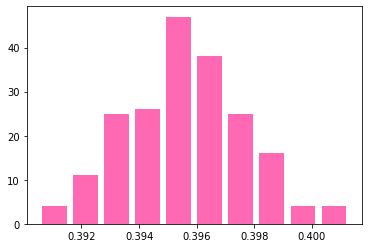

In [51]:
values = [ srs_average_dist_self(n_points, point_list, 10000) for _ in range(200) ]
plt.hist(values, bins=10, cumulative=False, histtype='bar', orientation='vertical', rwidth=0.8,color='hotpink')
plt.show()

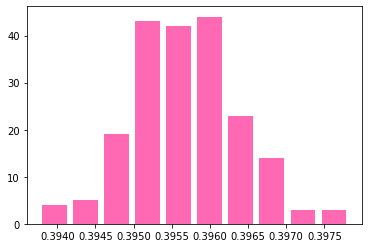

In [52]:
values = [ srs_average_dist_self(n_points, point_list, 100000) for _ in range(200) ]
plt.hist(values, bins=10, cumulative=False, histtype='bar', orientation='vertical', rwidth=0.8,color='hotpink')
plt.show()

In [57]:
res_srs = list()
for n_samples in test_n_samples:
    values = [ srs_average_dist_self(n_points, point_list, n_samples) for _ in range(200) ]
    var = variance_of_sample_means(values)
    res_srs.append(var)

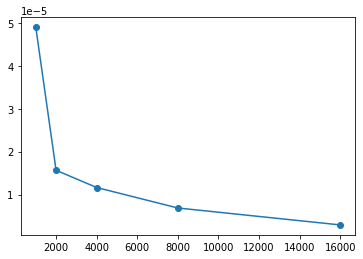

In [58]:
plt.plot( test_n_samples, res_srs, linestyle='-', marker='o')
plt.show()

# Stratified Sampling

In [23]:
with open('1000000.grid', 'r') as grid_file:
    grid_lines = grid_file.readlines() 
    grid_x = [ float(v) for v in grid_lines[0].strip().split(",") ]
    grid_y = [ float(v) for v in grid_lines[1].strip().split(",") ]
    grid_size = [ int(v) for v in grid_lines[2].strip().split(",") ]

In [29]:
grid_size

[224531,
 153663,
 71994,
 23101,
 153501,
 106050,
 49407,
 15857,
 72541,
 49307,
 23308,
 7701,
 23268,
 15864,
 7511,
 2396]

### Compute sample size in each grid unit

In [24]:
population_size = cnt * (cnt - 1) / 2

# ratio to population size
strata_ratio = [ 
    [ float(s * t) / float(population_size) if i < j else 0 for j, s in enumerate(grid_size) ]
    for i, t in enumerate(grid_size)
]
for i, s in enumerate(grid_size):
    strata_ratio[i][i] = float(s * (s-1) / 2) / float(population_size)

In [25]:
strata_sample_size

[[504, 690, 323, 104, 689, 476, 222, 71, 326, 221, 105, 35, 104, 71, 34, 11],
 [0, 236, 221, 71, 472, 326, 152, 49, 223, 152, 72, 24, 72, 49, 23, 7],
 [0, 0, 52, 33, 221, 153, 71, 23, 104, 71, 34, 11, 34, 23, 11, 3],
 [0, 0, 0, 5, 71, 49, 23, 7, 34, 23, 11, 4, 11, 7, 3, 1],
 [0, 0, 0, 0, 236, 326, 152, 49, 223, 151, 72, 24, 71, 49, 23, 7],
 [0, 0, 0, 0, 0, 112, 105, 34, 154, 105, 49, 16, 49, 34, 16, 5],
 [0, 0, 0, 0, 0, 0, 24, 16, 72, 49, 23, 8, 23, 16, 7, 2],
 [0, 0, 0, 0, 0, 0, 0, 3, 23, 16, 7, 2, 7, 5, 2, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 53, 72, 34, 11, 34, 23, 11, 3],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 23, 8, 23, 16, 7, 2],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 4, 11, 7, 4, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 2, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 7, 3, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [26]:
# flatten
flatten_strata_ratio = [ v for row in strata_ratio for v in row ]
flatten_strata_sample_size = [ v for row in strata_sample_size for v in row ]

### Sample point IDs from each grid unit

1.

With each grid ID i,
* For $S_{ij}$ with all $j \geq i$, sample <code>strata_sample_size[i][j]</code> point IDs from $G_i$ and $G_j$ respectively

2.

Make pairs of points each of which comes from different grid units

3.

With every pair,
* compute distance (refer to broadcast data)
* output distance with strata ID as key

4.

Compute average with each stratum

In [33]:
def get_grid_idx (x, grid_x):
    for idx, excl_max in enumerate(grid_x):
        if x < excl_max:
            return idx

grid_group = [ list() for _ in range(len(grid_size)) ]
for x, y in point_list:
    grid_group[get_grid_idx(x, grid_x) + get_grid_idx(y, grid_y) * len(grid_x)].append((x, y))

# check size
for i, l in enumerate(grid_group):
    assert grid_size[i] == len(l)

16


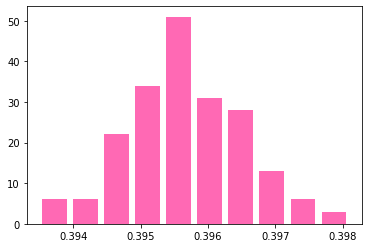

In [49]:
def str_average_distance(grid_group, n_sampe_size, n_try):
    # e.g., with 1000000.grid, n_grid_units = 16
    n_grid_units = len(grid_size);
    
    # strata sample size allocation
    strata_sample_size = [ 
        [ round(float(n_sample_size) * strata_ratio[i][j]) for j, s in enumerate(grid_size) ]
        for i, t in enumerate(grid_size)
    ]

    # compute mean of each stratum
    strata_means = [ [ None for _ in range(n_grid_units)] for _ in range(n_grid_units) ]

    for i in range(n_grid_units):
        for j in range(n_grid_units):
            if j == i:
                # sample with replacement
                values = [ srs_average_dist_self(len(grid_group[i]), grid_group[i], strata_sample_size[i][j]) for _ in range(200) ]
                strata_means[i][i] = values

            elif j > i:
                values = [ srs_average_dist(len(grid_group[i]), grid_group[i], len(grid_group[j]), grid_group[j], strata_sample_size[i][j]) for _ in range(200) ]
                strata_means[i][j] = values


    stratified_mean = [ 0. for _ in range(200) ]
    for k in range(200):
        # compute stratified estimator of distances
        for i in range(n_grid_units):
            for j in range(n_grid_units):
                if j >= i:
                    stratified_mean[k] += strata_ratio[i][j] * strata_means[i][j][k]

plt.hist(stratified_mean, bins=10, cumulative=False, histtype='bar', orientation='vertical', rwidth=0.8,color='hotpink')
plt.show()

In [ ]:
res_srs = list()
for n_samples in test_n_samples:
    values = [ srs_average_dist_self(n_points, point_list, n_samples) for _ in range(200) ]
    var = variance_of_sample_means(values)
    res_srs.append(var)